In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import os
import json
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [10]:
classes = ["분노","슬픔","불안","상처","당황","기쁨","중립"]
classes_dict = []

for class_ in classes:
    json_path =f"데이터 전처리\원천 데이터\[라벨]EMOIMG_{class_}_TRAIN\img_emotion_training_data({class_}).json"

    with open(json_path, 'r') as json_file:
        data = json.load(json_file)
    classes_dict.append({item["filename"].split(".")[0]: item for item in data})

100%|██████████| 73326/73326 [00:00<00:00, 211270.21it/s]


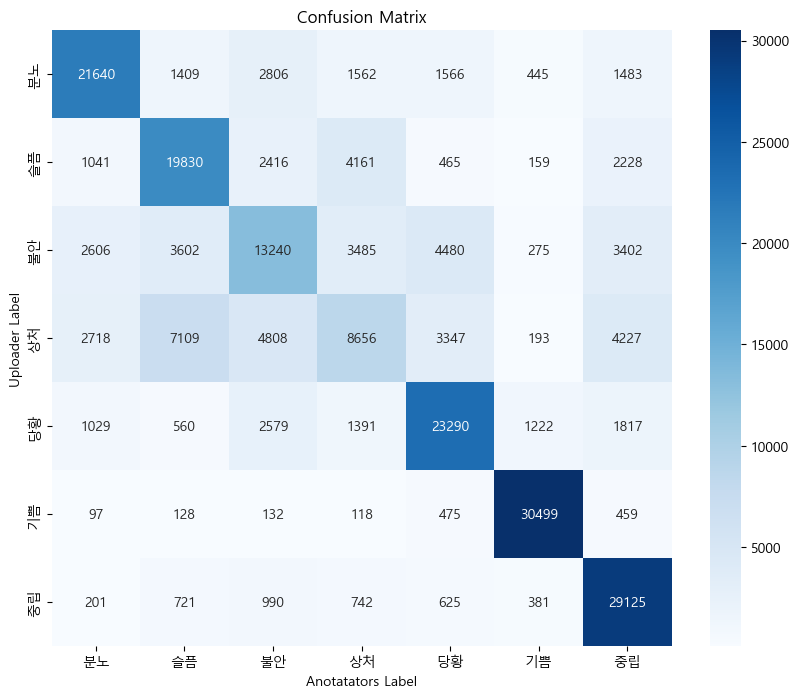

In [11]:
path = "데이터 전처리/2차 검수/2차_검수_종합"
confusion_matrix = {label: Counter({l: 0 for l in classes}) for label in classes}

for img in tqdm(os.listdir(path)):
    temp = (img.split(".")[0]).split("_")
    filename = "_".join(temp[1:])
    label = int(temp[0])
    item = classes_dict[label][filename]

    uploader_emotion = item["faceExp_uploader"]
    annotations = [item.get("annot_A", {}).get("faceExp", ""),
                    item.get("annot_B", {}).get("faceExp", ""),
                    item.get("annot_C", {}).get("faceExp", "")]
    for annot in annotations:
            if annot in classes:  # 유효한 라벨만 사용 (알수없음 등 제외)
                confusion_matrix[uploader_emotion][annot] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(confusion_matrix).T, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Uploader Label')
plt.xlabel('Anotatators Label')
plt.show()

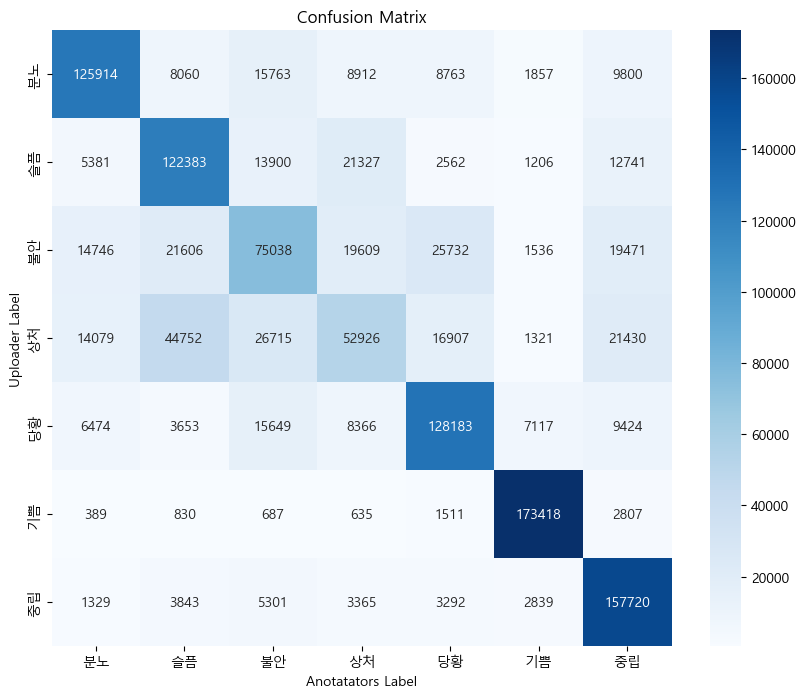

In [9]:
classes = ["분노","슬픔","불안","상처","당황","기쁨","중립"]
classes_dict = []
count = 0

for idx,class_ in enumerate(classes):
    our_data = os.listdir("최종데이터셋/all/")

    for item in data:
        uploader_emotion = item["faceExp_uploader"]
        annotations = [item.get("annot_A", {}).get("faceExp", ""),
                        item.get("annot_B", {}).get("faceExp", ""),
                        item.get("annot_C", {}).get("faceExp", "")]
        # print(uploader_emotion,annotations)
        for annot in annotations:
            if annot in classes:  # 유효한 라벨만 사용 (알수없음 등 제외)
                confusion_matrix[uploader_emotion][annot] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(confusion_matrix).T, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Uploader Label')
plt.xlabel('Anotatators Label')
plt.show()